In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from IPython.display import Image
plt.rcParams['image.cmap'] = 'gray'

In [57]:
bg_img= cv2.imread('leaves.jpg',cv2.IMREAD_UNCHANGED)
logo = cv2.imread('opencv_logo.png',cv2.IMREAD_UNCHANGED)

logo_real= cv2.cvtColor(logo,cv2.COLOR_RGB2BGR)

Text(0.5, 1.0, 'logo')

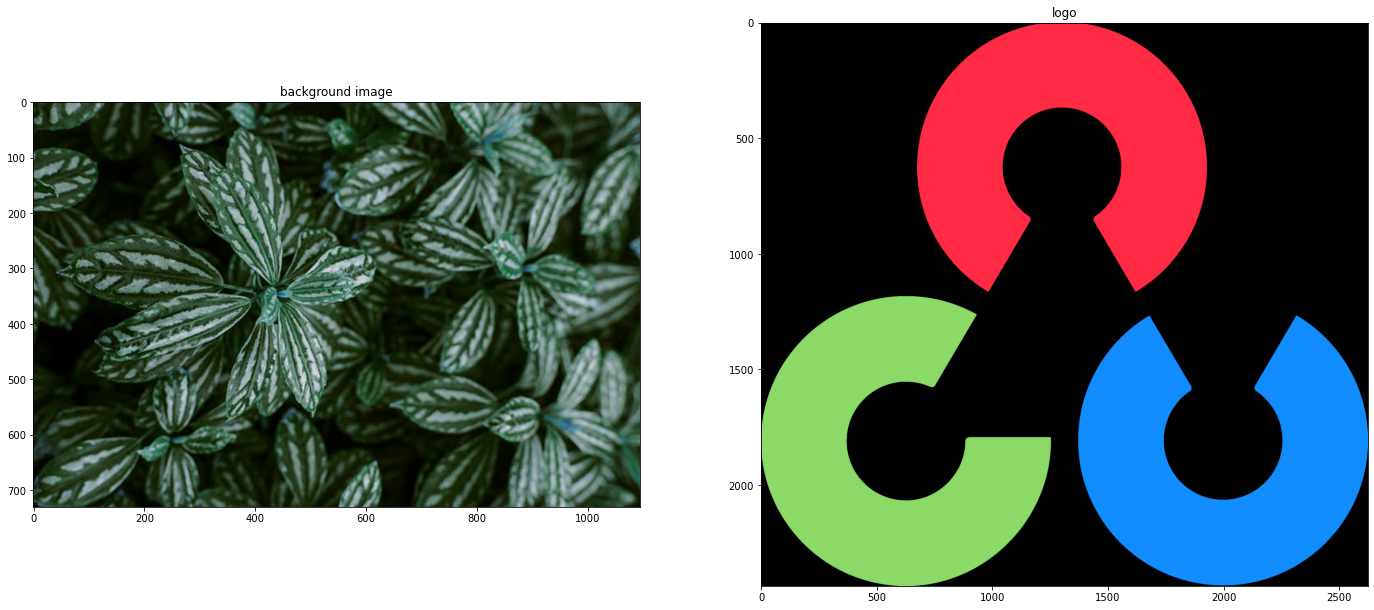

In [58]:
plt.figure(figsize=[50,50])

plt.subplot(141);plt.imshow(bg_img);plt.title('background image')
plt.subplot(142);plt.imshow(logo_real);plt.title('logo')

In [59]:
bg_img.shape

(730, 1094, 3)

In [60]:
logo.shape

(2436, 2623, 4)

In [61]:
##logo manipulation
logo_resize=cv2.resize(logo,None,fy=0.1,fx=0.1,interpolation = cv2.INTER_LINEAR)

# Retrieve the image and logo shapes.
img_h, img_w, _ = bg_img.shape
logo_h, logo_w, _ = logo.shape
logo_resize.shape


(244, 262, 4)

(730, 764, 3)

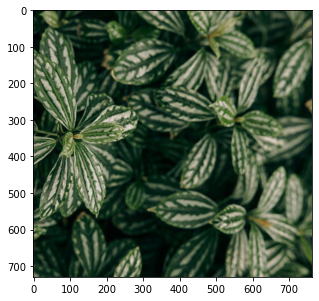

In [77]:
cx=int(img_w/2)
cy=int(img_h/2)


# tlc : top left corner.
tlc_x = int(cx - logo_w/2)
tlc_y = int(cy - logo_h/2)

# brc : bottom right corner.
brc_x = int(cx + logo_w/2)
brc_y = int(cy + logo_h/2)


roi = bg_img[tlc_y:brc_y, tlc_x:brc_x]

# Display the ROI.
plt.figure(figsize = (5, 5))
plt.imshow(roi[:, :, ::-1]);
# image_text=cv2.rectangle(bg_img, (100, 500 ), (400,600 ), (255,255,0), thickness = 3, lineType = cv2.LINE_8)
# plt.imshow(image_text)

roi.shape

(244, 262)
(244, 262, 3)


Text(0.5, 1.0, 'logo_alpha')

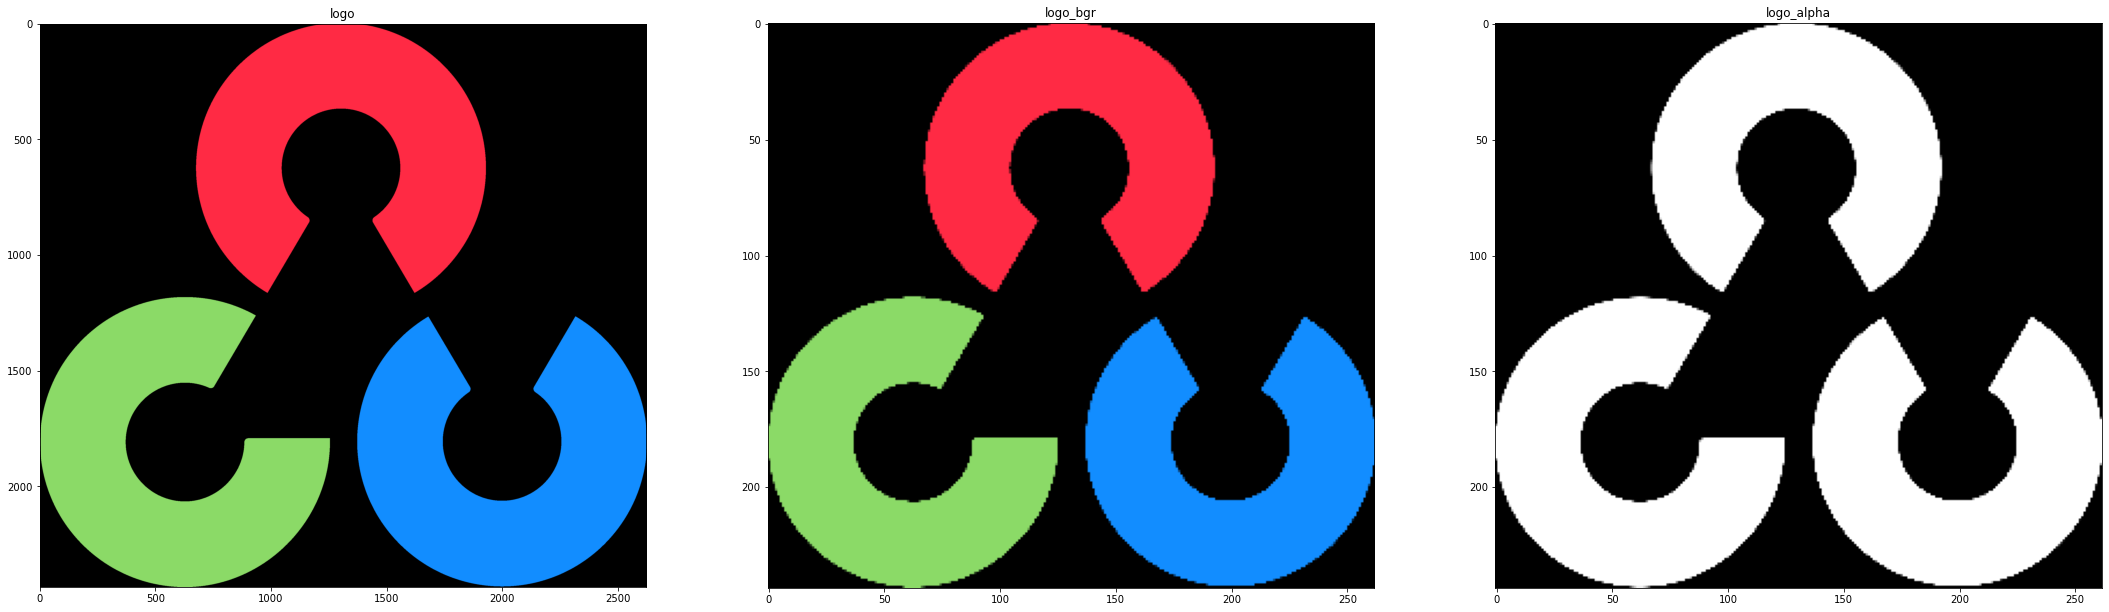

In [104]:
logo_bgr=logo_resize[:,:,0:3]
logo_alpha=logo_resize[:, :, 3]
print(logo_alpha.shape)
print(logo_bgr.shape)
# masked_logo = cv2.bitwise_and(logo_bgr, logo_alpha)

plt.figure(figsize=[50,50])

plt.subplot(141);plt.imshow(logo_real);plt.title('logo')
plt.subplot(142);plt.imshow(logo_bgr[:, :, ::-1]);plt.title('logo_bgr')
plt.subplot(143);plt.imshow(logo_alpha);plt.title('logo_alpha')
# plt.subplot(144);plt.imshow(masked_logo);plt.title('masked_logo')

In [113]:
logo_dd_alpha=cv2.merge([logo_alpha,logo_alpha,logo_alpha])
logo_dd_alpha=cv2.resize(logo_dd_alpha,(roi.shape[1],roi.shape[0]),None,interpolation = cv2.INTER_AREA)
logo_dd_alpha_inv=cv2.bitwise_not(logo_dd_alpha)
logo_bgr=cv2.resize(logo_bgr,(roi.shape[1],roi.shape[0]),None,interpolation = cv2.INTER_AREA)

roi_inv= cv2.bitwise_and(roi,logo_dd_alpha_inv)
logo_bgr_new= cv2.bitwise_or(logo_bgr,roi_inv)


Text(0.5, 1.0, 'roi_inv')

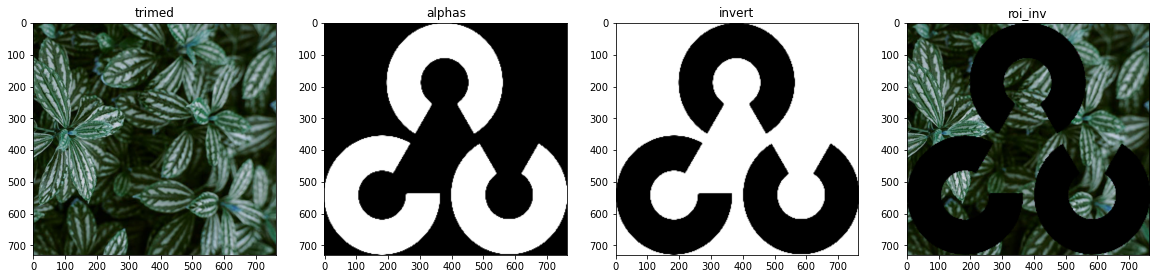

In [117]:
plt.figure(figsize=[20,20])

plt.subplot(141);plt.imshow(bg_img[tlc_y:brc_y,tlc_x:brc_x]);plt.title('trimed')
plt.subplot(142);plt.imshow(logo_dd_alpha);plt.title('alphas')
plt.subplot(143);plt.imshow(logo_dd_alpha_inv);plt.title('invert')
plt.subplot(144);plt.imshow(roi_inv);plt.title('roi_inv')


Text(0.5, 1.0, 'final')

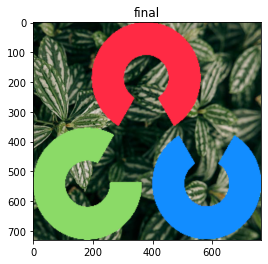

In [118]:
plt.imshow(logo_bgr_new[:,:,::-1]);plt.title('final')

In [119]:
bg_img[tlc_y:brc_y, tlc_x:brc_x] =logo_bgr_new

Text(0.5, 1.0, 'final')

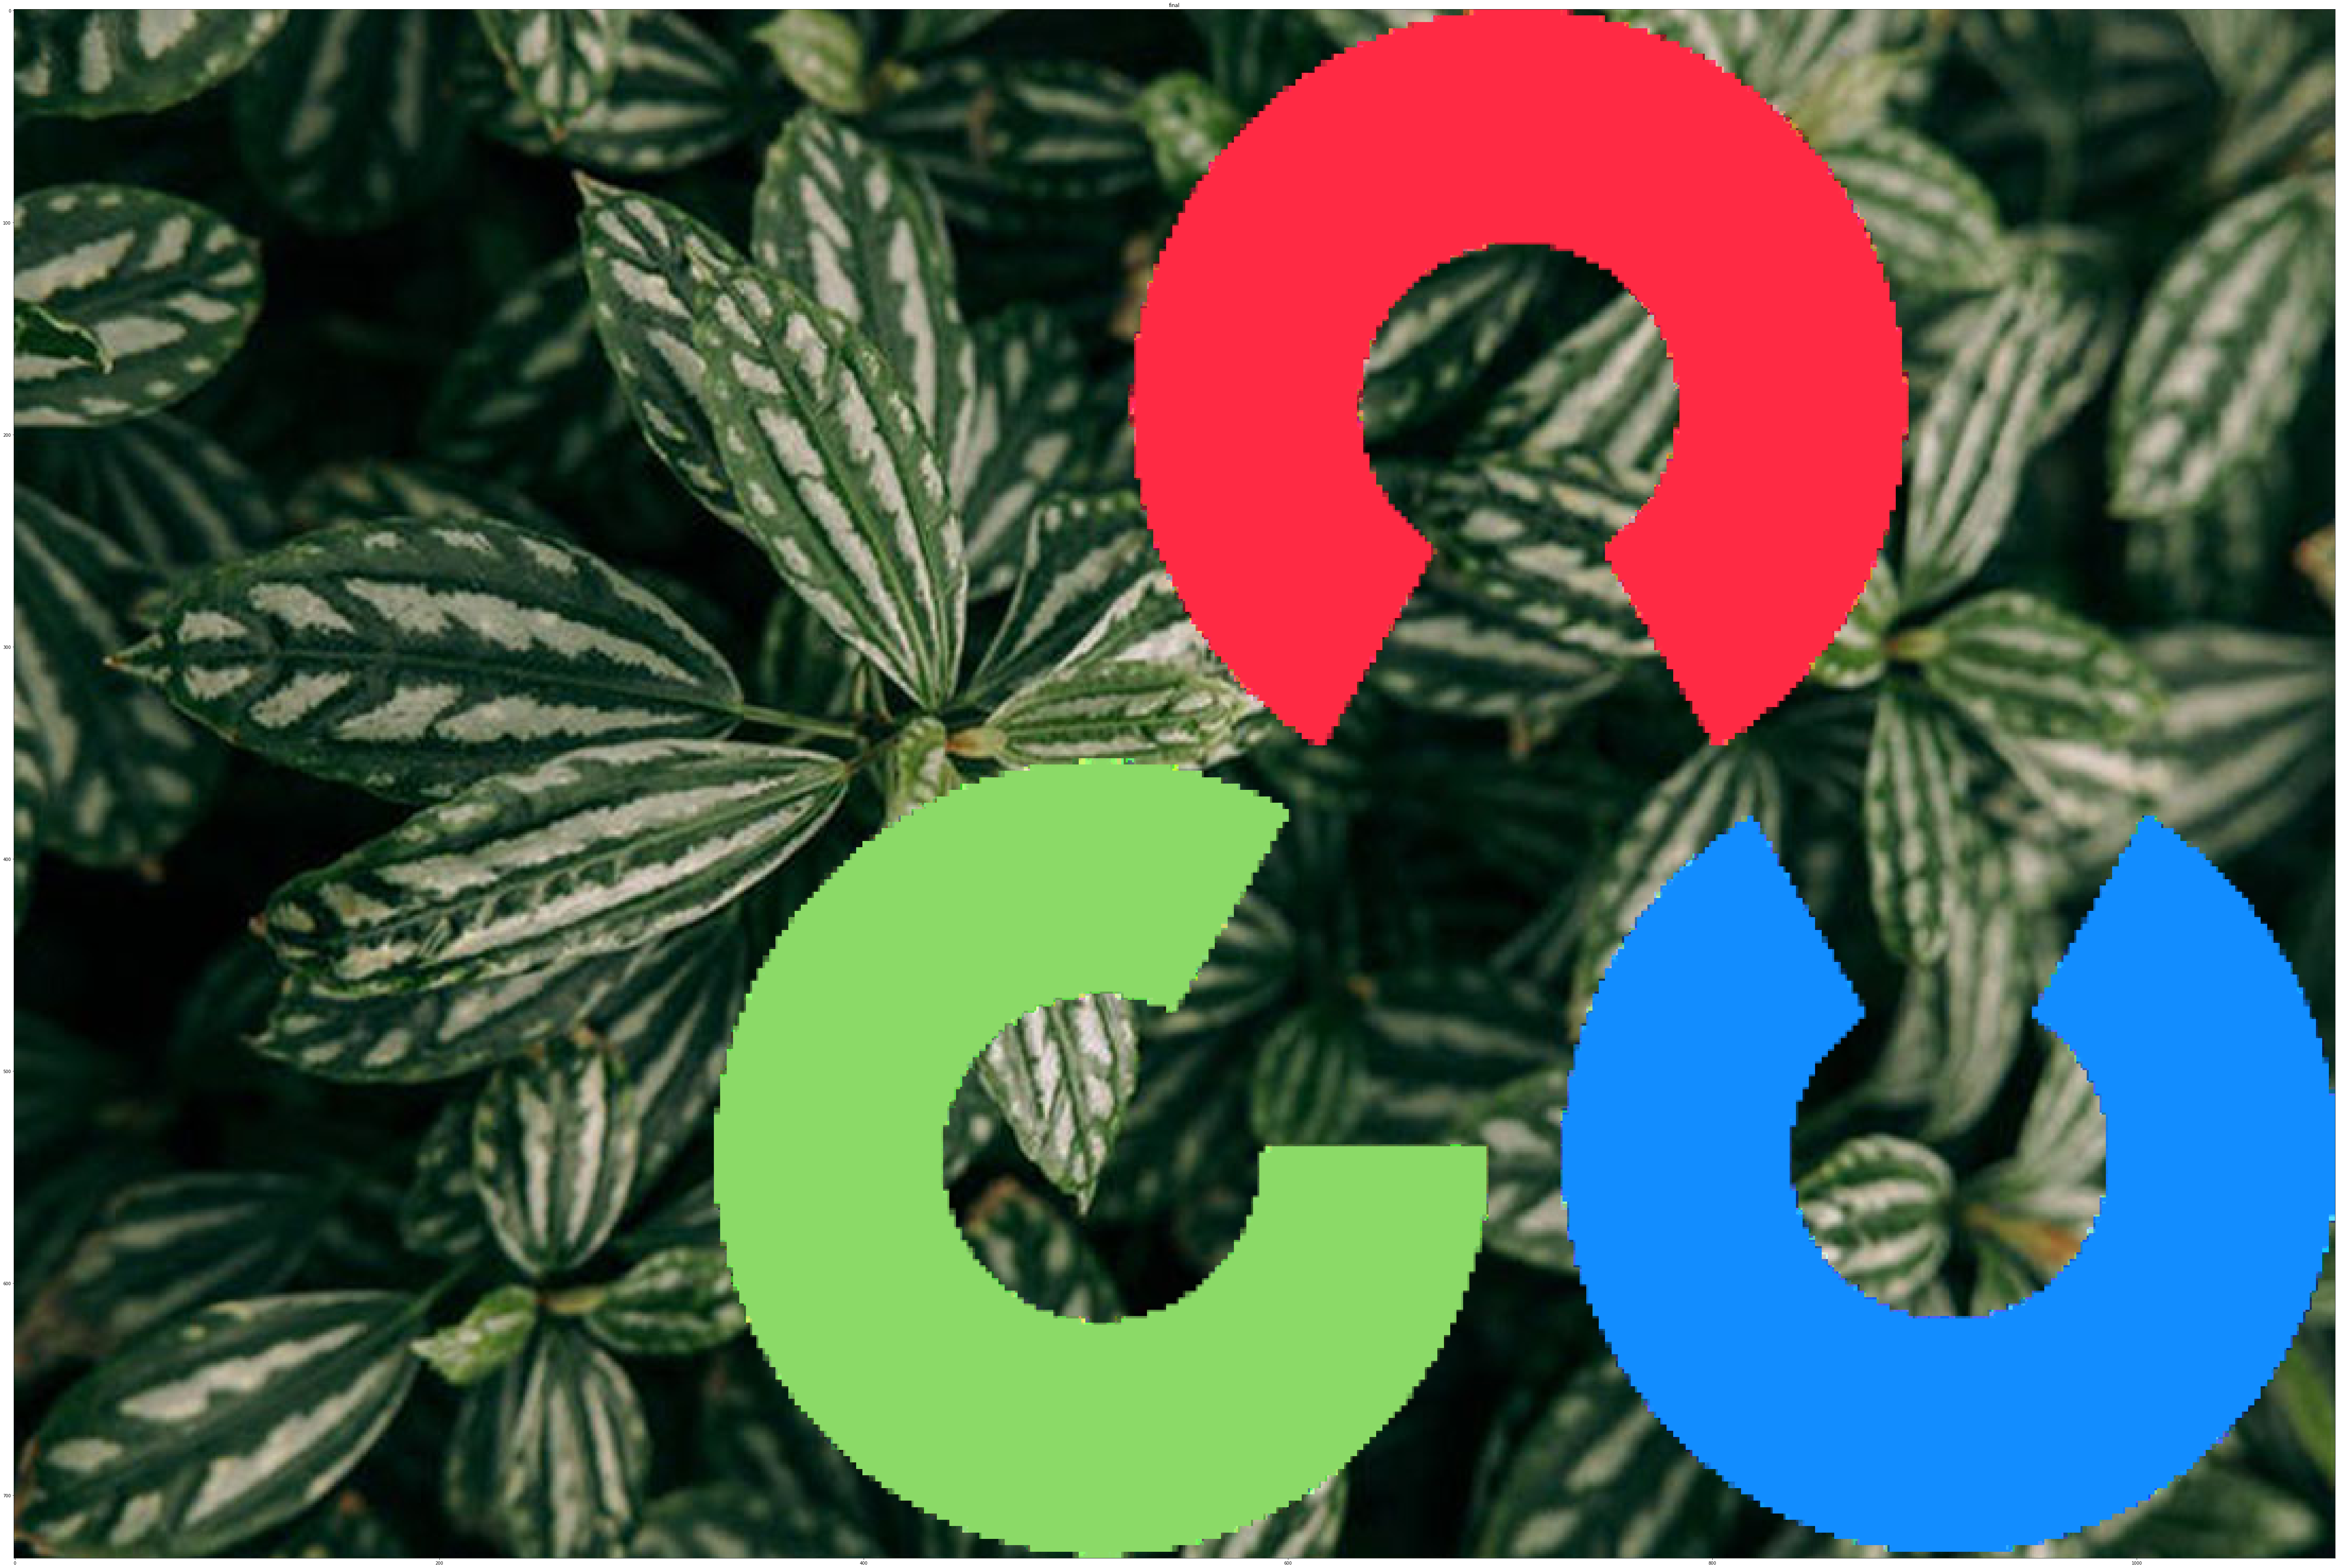

In [121]:
plt.figure(figsize=[100,100])

plt.imshow(bg_img[:,:,::-1]);plt.title('final')